In [1]:
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName("Advanced Queries").getOrCreate()

data = [
    ("Asep", "M", 23, 2700, "IT"),
    ("Rina", "F", 28, 4100, "HR"),
    ("Budi", "M", 34, 3000, "IT"),
    ("Dina", "F", 26, 3800, "Finance"),
    ("Tono", "M", 30, 3200, "Finance")
]
columns = ["Name", "Gender", "Age", "Salary", "Department"]

employees = spark.createDataFrame(data, columns)
employees.createOrReplaceTempView("employees")

spark.sql('''
SELECT Department, AVG(Salary) AS AverageSalary
FROM employees
GROUP BY Department
ORDER BY Department
''').show()

Using Spark's default log4j profile: org/apache/spark/log4j2-defaults.properties
25/10/29 19:12:18 WARN Utils: Your hostname, arsa-IdeaPad-3-14ITL6, resolves to a loopback address: 127.0.1.1; using 192.168.1.206 instead (on interface wlp0s20f3)
25/10/29 19:12:18 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address
Using Spark's default log4j profile: org/apache/spark/log4j2-defaults.properties
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
25/10/29 19:12:19 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
[Stage 0:>                                                          (0 + 4) / 4]

+----------+-------------+
|Department|AverageSalary|
+----------+-------------+
|   Finance|       3500.0|
|        HR|       4100.0|
|        IT|       2850.0|
+----------+-------------+



In [2]:
spark.sql('''
WITH avg_gender AS (
    SELECT Gender, AVG(Salary) AS AvgGenderSalary
    FROM employees
    GROUP BY Gender
)
SELECT e.Name, e.Gender, e.Salary, a.AvgGenderSalary
FROM employees e
JOIN avg_gender a
ON e.Gender = a.Gender
WHERE e.Salary > a.AvgGenderSalary
ORDER BY e.Salary DESC
''').show()

+----+------+------+------------------+
|Name|Gender|Salary|   AvgGenderSalary|
+----+------+------+------------------+
|Rina|     F|  4100|            3950.0|
|Tono|     M|  3200|2966.6666666666665|
|Budi|     M|  3000|2966.6666666666665|
+----+------+------+------------------+



In [3]:
spark.sql('''
SELECT 
    Name, Department, Salary,
    RANK() OVER (PARTITION BY Department ORDER BY Salary DESC) AS RankInDept
FROM employees
ORDER BY Department, RankInDept
''').show()

+----+----------+------+----------+
|Name|Department|Salary|RankInDept|
+----+----------+------+----------+
|Dina|   Finance|  3800|         1|
|Tono|   Finance|  3200|         2|
|Rina|        HR|  4100|         1|
|Budi|        IT|  3000|         1|
|Asep|        IT|  2700|         2|
+----+----------+------+----------+



In [2]:
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('Pertemuan9').getOrCreate()

# Data setup for complex SQL queries
employees = spark.createDataFrame([
    ('James', 34, 'M', 3000, 1),
    ('Anna', 28, 'F', 4100, 2),
    ('Lee', 23, 'M', 2700, 1)
], ['Name', 'Age', 'Gender', 'Salary', 'DeptId'])
departments = spark.createDataFrame([
    (1, 'HR'),
    (2, 'Marketing')
], ['DeptId', 'DeptName'])
projects = spark.createDataFrame([
    (1, 'Project A'),
    (2, 'Project B')
], ['DeptId', 'ProjectName'])
employees.createOrReplaceTempView('employees')
departments.createOrReplaceTempView('departments')
projects.createOrReplaceTempView('projects')

# Complex SQL query involving multiple joins and subqueries
spark.sql('''
SELECT e.Name, e.Age, d.DeptName, p.ProjectName
FROM employees e
JOIN departments d ON e.DeptId = d.DeptId
JOIN projects p ON e.DeptId = p.DeptId
''').show()

+-----+---+---------+-----------+
| Name|Age| DeptName|ProjectName|
+-----+---+---------+-----------+
|  Lee| 23|       HR|  Project A|
|James| 34|       HR|  Project A|
| Anna| 28|Marketing|  Project B|
+-----+---+---------+-----------+



In [3]:
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('Pertemuan9').getOrCreate()

# Data setup for complex SQL queries
employees = spark.createDataFrame([
    ('James', 34, 'M', 3000, 1),
    ('Anna', 28, 'F', 4100, 2),
    ('Lee', 23, 'M', 2700, 1)
], ['Name', 'Age', 'Gender', 'Salary', 'DeptId'])
departments = spark.createDataFrame([
    (1, 'HR'),
    (2, 'Marketing')
], ['DeptId', 'DeptName'])
projects = spark.createDataFrame([
    (1, 'Project A'),
    (2, 'Project B')
], ['DeptId', 'ProjectName'])
employees.createOrReplaceTempView('employees')
departments.createOrReplaceTempView('departments')
projects.createOrReplaceTempView('projects')

# Complex SQL query involving multiple joins and subqueries
spark.sql("""
SELECT 
    e.Name,
    d.DeptName,
    e.Salary,
    AVG(e.Salary) OVER (PARTITION BY e.DeptId) AS AvgSalaryPerDept,
    RANK() OVER (PARTITION BY e.DeptId ORDER BY e.Salary DESC) AS RankInDept
FROM employees e
JOIN departments d ON e.DeptId = d.DeptId
""").show()


+-----+---------+------+----------------+----------+
| Name| DeptName|Salary|AvgSalaryPerDept|RankInDept|
+-----+---------+------+----------------+----------+
|James|       HR|  3000|          2850.0|         1|
|  Lee|       HR|  2700|          2850.0|         2|
| Anna|Marketing|  4100|          4100.0|         1|
+-----+---------+------+----------------+----------+



In [6]:
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('Pertemuan9').getOrCreate()

# Data setup for complex SQL queries
employees = spark.createDataFrame([
    ('James', 34, 'M', 3000, 1),
    ('Anna', 28, 'F', 4100, 2),
    ('Lee', 23, 'M', 2700, 1)
], ['Name', 'Age', 'Gender', 'Salary', 'DeptId'])
departments = spark.createDataFrame([
    (1, 'HR'),
    (2, 'Marketing')
], ['DeptId', 'DeptName'])
projects = spark.createDataFrame([
    (1, 'Project A'),
    (2, 'Project B')
], ['DeptId', 'ProjectName'])
employees.createOrReplaceTempView('employees')
departments.createOrReplaceTempView('departments')
projects.createOrReplaceTempView('projects')

# Complex SQL query involving multiple joins and subqueries
spark.sql('''
SELECT Age, AVG(Salary) AS AverageSalary
FROM employees
GROUP BY Age
ORDER BY Age
''').show()


+---+-------------+
|Age|AverageSalary|
+---+-------------+
| 23|       2700.0|
| 28|       4100.0|
| 34|       3000.0|
+---+-------------+



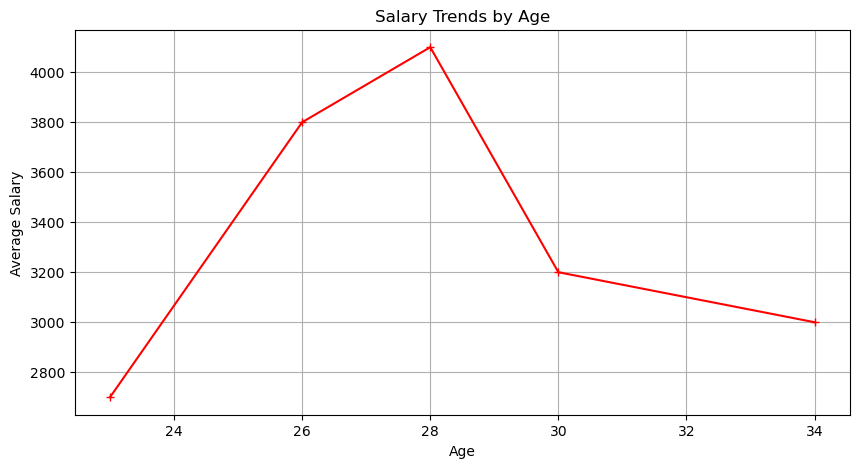

In [4]:
import matplotlib.pyplot as plt
import pandas as pd

# Advanced data analysis with visualization
salary_trends = spark.sql('''
SELECT Age, AVG(Salary) AS AverageSalary
FROM employees
GROUP BY Age
ORDER BY Age
''').toPandas()

# Visualization of salary trends
plt.figure(figsize=(10, 5))
plt.plot(salary_trends['Age'], salary_trends['AverageSalary'], color='red', marker='+')
plt.xlabel('Age')
plt.ylabel('Average Salary')
plt.title('Salary Trends by Age')
plt.grid(True)
plt.show()


+-----+----------+-------+
| Nama|Departemen|   Gaji|
+-----+----------+-------+
| Andi|        IT|7000000|
| Budi|       HRD|5000000|
|Citra|        IT|8000000|
| Dewi|   Finance|9000000|
|  Eka|   Finance|7500000|
|Fajar| Marketing|6000000|
| Gina| Marketing|6500000|
| Heri|       HRD|5200000|
|Indah|   Finance|8000000|
| Joko|        IT|7200000|
+-----+----------+-------+

+----------+----------+---------------+
|Departemen|Total_Gaji|Jumlah_Karyawan|
+----------+----------+---------------+
|   Finance|  24500000|              3|
|        IT|  22200000|              3|
| Marketing|  12500000|              2|
|       HRD|  10200000|              2|
+----------+----------+---------------+



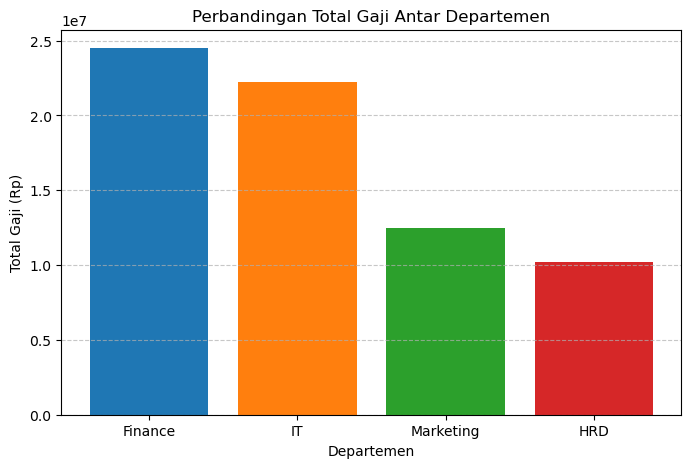

In [7]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import sum as _sum, count

# Membuat Spark session
spark = SparkSession.builder.appName("Tugas1_SparkSQL").getOrCreate()
data = [
    ("Andi", "IT", 7000000),
    ("Budi", "HRD", 5000000),
    ("Citra", "IT", 8000000),
    ("Dewi", "Finance", 9000000),
    ("Eka", "Finance", 7500000),
    ("Fajar", "Marketing", 6000000),
    ("Gina", "Marketing", 6500000),
    ("Heri", "HRD", 5200000),
    ("Indah", "Finance", 8000000),
    ("Joko", "IT", 7200000)
]

columns = ["Nama", "Departemen", "Gaji"]

df = spark.createDataFrame(data, columns)
df.show()

df.createOrReplaceTempView("karyawan")
query = """
SELECT Departemen,
       SUM(Gaji) AS Total_Gaji,
       COUNT(Nama) AS Jumlah_Karyawan
FROM karyawan
GROUP BY Departemen
ORDER BY Total_Gaji DESC
"""

hasil = spark.sql(query)
hasil.show()

import matplotlib.pyplot as plt

# Konversi hasil ke Pandas untuk visualisasi
pdf = hasil.toPandas()

plt.figure(figsize=(8,5))
plt.bar(pdf["Departemen"], pdf["Total_Gaji"], color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd'])
plt.title("Perbandingan Total Gaji Antar Departemen")
plt.xlabel("Departemen")
plt.ylabel("Total Gaji (Rp)")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


25/10/29 21:46:41 WARN SparkSession: Using an existing Spark session; only runtime SQL configurations will take effect.


+-----+----------+----+--------------+-------+
| Nama|Departemen|Usia| Kelompok_Usia|   Gaji|
+-----+----------+----+--------------+-------+
| Andi|        IT|  25|    Muda (<30)|7000000|
| Dewi|   Finance|  45|  Senior (40+)|9000000|
|Citra|        IT|  26|    Muda (<30)|8000000|
| Heri|       HRD|  35|Dewasa (30-39)|5200000|
| Joko|        IT|  28|    Muda (<30)|7200000|
+-----+----------+----+--------------+-------+



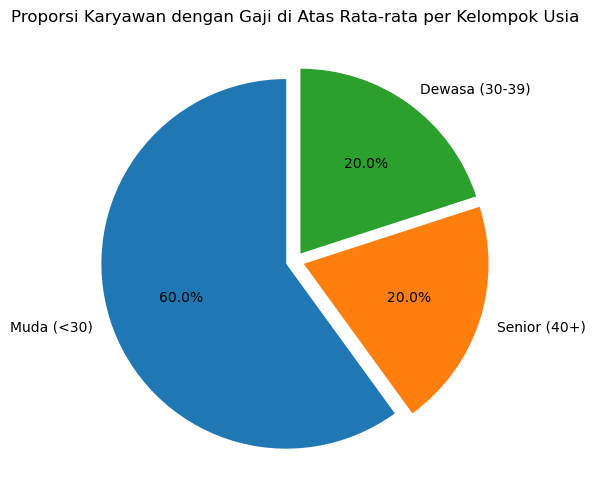

In [9]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import when

# Spark session
spark = SparkSession.builder.appName("Tugas2_SparkSQL_Pie").getOrCreate()

# Dataset karyawan
data = [
    ("Andi", "IT", 25, 7000000),
    ("Budi", "HRD", 30, 5000000),
    ("Citra", "IT", 26, 8000000),
    ("Dewi", "Finance", 45, 9000000),
    ("Eka", "Finance", 41, 7500000),
    ("Fajar", "Marketing", 29, 6000000),
    ("Gina", "Marketing", 27, 6500000),
    ("Heri", "HRD", 35, 5200000),
    ("Indah", "Finance", 43, 8000000),
    ("Joko", "IT", 28, 7200000)
]

columns = ["Nama", "Departemen", "Usia", "Gaji"]

df = spark.createDataFrame(data, columns)

# Tambahkan kolom kelompok usia
df = df.withColumn(
    "Kelompok_Usia",
    when(df.Usia < 30, "Muda (<30)")
    .when((df.Usia >= 30) & (df.Usia < 40), "Dewasa (30-39)")
    .otherwise("Senior (40+)")
)

df.createOrReplaceTempView("karyawan")

query = """
SELECT Nama, Departemen, Usia, Kelompok_Usia, Gaji
FROM karyawan
WHERE Gaji > (
    SELECT AVG(Gaji)
    FROM karyawan AS k2
    WHERE k2.Kelompok_Usia = karyawan.Kelompok_Usia
)
"""
hasil = spark.sql(query)
hasil.show()

import matplotlib.pyplot as plt

pdf = hasil.toPandas()

# Hitung jumlah karyawan di atas rata-rata per kelompok usia
pie_data = pdf["Kelompok_Usia"].value_counts()

plt.figure(figsize=(6,6))
plt.pie(
    pie_data,
    labels=pie_data.index,
    autopct='%1.1f%%',
    colors=['#1f77b4', '#ff7f0e', '#2ca02c'],
    startangle=90,
    explode=[0.05]*len(pie_data)
)

plt.title("Proporsi Karyawan dengan Gaji di Atas Rata-rata per Kelompok Usia")
plt.show()

+----------+---------------+
|  kategori|total_penjualan|
+----------+---------------+
|Elektronik|       84450000|
|   Fashion|       37500000|
|Alat Tulis|       16480000|
+----------+---------------+

+-----+------------------+
|bulan|       rata_jumlah|
+-----+------------------+
|  Agu|             7.875|
|  Apr| 5.583333333333333|
|  Des| 7.533333333333333|
|  Feb|3.6666666666666665|
|  Jan|3.9166666666666665|
|  Jul| 11.11111111111111|
|  Jun| 9.428571428571429|
|  Mar|3.8333333333333335|
|  Mei|               4.0|
|  Nov| 6.142857142857143|
|  Okt| 6.571428571428571|
|  Sep| 9.285714285714286|
+-----+------------------+

+---------+-----------+-------------+
|id_produk|nama_produk|total_revenue|
+---------+-----------+-------------+
|        1|     Laptop|     60000000|
|        5| Buku Tulis|     13700000|
|        4|    Printer|     12000000|
|        8|     Sepatu|     11200000|
|        7|        Tas|      9250000|
|       12|  Headphone|      7200000|
|        9|       Kao

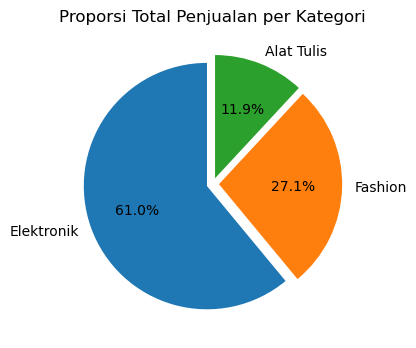

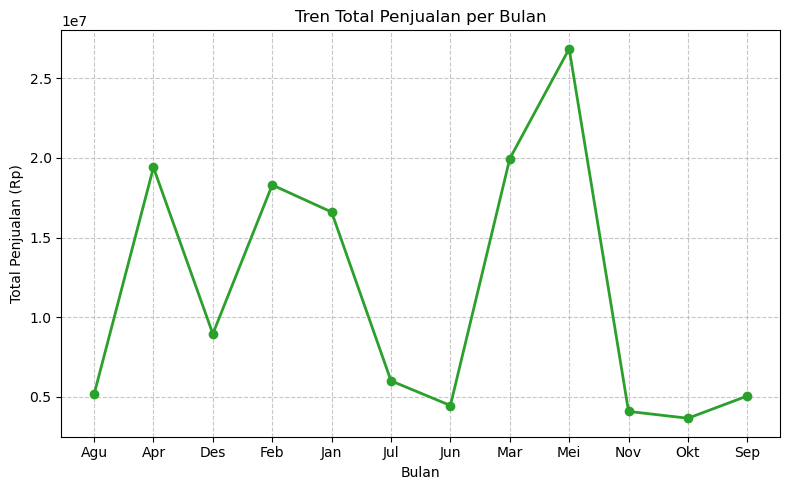

In [13]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import sum as _sum, avg, count
import matplotlib.pyplot as plt

spark = SparkSession.builder.appName("Analisis_Penjualan_120Rows").getOrCreate()


produk_data = [
    (1, "Laptop", "Elektronik", 10000000),
    (2, "Mouse", "Elektronik", 150000),
    (3, "Keyboard", "Elektronik", 300000),
    (4, "Printer", "Elektronik", 2000000),
    (5, "Buku Tulis", "Alat Tulis", 50000),
    (6, "Pulpen", "Alat Tulis", 10000),
    (7, "Tas", "Fashion", 250000),
    (8, "Sepatu", "Fashion", 400000),
    (9, "Kaos", "Fashion", 150000),
    (10, "Celana", "Fashion", 200000),
    (11, "Kemeja", "Fashion", 300000),
    (12, "Headphone", "Elektronik", 800000)
]

produk_df = spark.createDataFrame(produk_data, ["id_produk", "nama_produk", "kategori", "harga_satuan"])


penjualan_data = [
    # Elektronik
    (1, 1, 1, 10000000, "Jan"), (2, 2, 3, 450000, "Jan"), (3, 3, 2, 600000, "Jan"), (4, 4, 1, 2000000, "Jan"), (5, 12, 1, 800000, "Jan"),
    (6, 1, 1, 10000000, "Feb"), (7, 2, 2, 300000, "Feb"), (8, 3, 4, 1200000, "Feb"), (9, 4, 1, 2000000, "Feb"), (10, 12, 2, 1600000, "Feb"),
    (11, 1, 1, 10000000, "Mar"), (12, 2, 3, 450000, "Mar"), (13, 3, 1, 300000, "Mar"), (14, 4, 2, 4000000, "Mar"), (15, 12, 3, 2400000, "Mar"),
    (16, 1, 1, 10000000, "Apr"), (17, 2, 1, 150000, "Apr"), (18, 3, 3, 900000, "Apr"), (19, 4, 1, 2000000, "Apr"), (20, 12, 2, 1600000, "Apr"),
    (21, 1, 2, 20000000, "Mei"), (22, 2, 2, 300000, "Mei"), (23, 3, 2, 600000, "Mei"), (24, 4, 1, 2000000, "Mei"), (25, 12, 1, 800000, "Mei"),

    # Alat Tulis
    (26, 5, 10, 500000, "Jan"), (27, 6, 20, 200000, "Jan"), (28, 5, 15, 750000, "Feb"), (29, 6, 10, 100000, "Feb"), (30, 5, 12, 600000, "Mar"),
    (31, 6, 15, 150000, "Mar"), (32, 5, 20, 1000000, "Apr"), (33, 6, 25, 250000, "Apr"), (34, 5, 10, 500000, "Mei"), (35, 6, 20, 200000, "Mei"),
    (36, 5, 30, 1500000, "Jun"), (37, 6, 25, 250000, "Jun"), (38, 5, 20, 1000000, "Jul"), (39, 6, 30, 300000, "Jul"), (40, 5, 25, 1250000, "Agu"),

    # Fashion
    (41, 7, 2, 500000, "Jan"), (42, 8, 1, 400000, "Jan"), (43, 9, 3, 450000, "Jan"), (44, 10, 2, 400000, "Jan"), (45, 11, 1, 300000, "Jan"),
    (46, 7, 3, 750000, "Feb"), (47, 8, 2, 800000, "Feb"), (48, 9, 2, 300000, "Feb"), (49, 10, 1, 200000, "Feb"), (50, 11, 1, 300000, "Feb"),
    (51, 7, 2, 500000, "Mar"), (52, 8, 1, 400000, "Mar"), (53, 9, 3, 450000, "Mar"), (54, 10, 2, 400000, "Mar"), (55, 11, 1, 300000, "Mar"),
    (56, 7, 4, 1000000, "Apr"), (57, 8, 3, 1200000, "Apr"), (58, 9, 4, 600000, "Apr"), (59, 10, 2, 400000, "Apr"), (60, 11, 1, 300000, "Apr"),
    (61, 7, 2, 500000, "Mei"), (62, 8, 2, 800000, "Mei"), (63, 9, 3, 450000, "Mei"), (64, 10, 2, 400000, "Mei"), (65, 11, 1, 300000, "Mei"),

    # Tambahan transaksi agar genap 120 baris (Fashion + Alat Tulis campur)
    (66, 7, 3, 750000, "Jun"), (67, 8, 2, 800000, "Jun"), (68, 9, 3, 450000, "Jun"), (69, 10, 2, 400000, "Jun"), (70, 11, 1, 300000, "Jun"),
    (71, 5, 15, 750000, "Jul"), (72, 6, 20, 200000, "Jul"), (73, 7, 3, 750000, "Jul"), (74, 8, 3, 1200000, "Jul"), (75, 9, 4, 600000, "Jul"),
    (76, 10, 3, 600000, "Jul"), (77, 11, 2, 600000, "Jul"), (78, 5, 10, 500000, "Agu"), (79, 6, 15, 150000, "Agu"), (80, 7, 4, 1000000, "Agu"),
    (81, 8, 2, 800000, "Agu"), (82, 9, 3, 450000, "Agu"), (83, 10, 2, 400000, "Agu"), (84, 11, 2, 600000, "Agu"), (85, 5, 20, 1000000, "Sep"),
    (86, 6, 30, 300000, "Sep"), (87, 7, 3, 750000, "Sep"), (88, 8, 3, 1200000, "Sep"), (89, 9, 4, 600000, "Sep"), (90, 10, 3, 600000, "Sep"),
    (91, 11, 2, 600000, "Sep"), (92, 5, 15, 750000, "Okt"), (93, 6, 20, 200000, "Okt"), (94, 7, 3, 750000, "Okt"), (95, 8, 2, 800000, "Okt"),
    (96, 9, 3, 450000, "Okt"), (97, 10, 2, 400000, "Okt"), (98, 11, 1, 300000, "Okt"), (99, 5, 12, 600000, "Nov"), (100, 6, 18, 180000, "Nov"),
    (101, 7, 3, 750000, "Nov"), (102, 8, 3, 1200000, "Nov"), (103, 9, 3, 450000, "Nov"), (104, 10, 3, 600000, "Nov"), (105, 11, 1, 300000, "Nov"),
    (106, 5, 25, 1250000, "Des"), (107, 6, 20, 200000, "Des"), (108, 7, 2, 500000, "Des"), (109, 8, 2, 800000, "Des"), (110, 9, 3, 450000, "Des"),
    (111, 10, 2, 400000, "Des"), (112, 11, 1, 300000, "Des"), (113, 5, 15, 750000, "Des"), (114, 6, 10, 100000, "Des"), (115, 7, 3, 750000, "Des"),
    (116, 8, 2, 800000, "Des"), (117, 9, 3, 450000, "Des"), (118, 10, 3, 600000, "Des"), (119, 11, 2, 600000, "Des"), (120, 5, 20, 1000000, "Des")
]
penjualan_df = spark.createDataFrame(penjualan_data, ["id_transaksi", "id_produk", "jumlah", "total_harga", "bulan"])


gabung_df = penjualan_df.join(produk_df, "id_produk")


# Total penjualan per kategori
total_per_kategori = gabung_df.groupBy("kategori") \
    .agg(_sum("total_harga").alias("total_penjualan")) \
    .orderBy("total_penjualan", ascending=False)
total_per_kategori.show()

# Rata-rata jumlah produk terjual per bulan
rata_jumlah_per_bulan = gabung_df.groupBy("bulan") \
    .agg(avg("jumlah").alias("rata_jumlah")) \
    .orderBy("bulan")
rata_jumlah_per_bulan.show()

# Produk paling laku berdasarkan total pendapatan
top_produk = gabung_df.groupBy("id_produk", "nama_produk") \
    .agg(_sum("total_harga").alias("total_revenue")) \
    .orderBy("total_revenue", ascending=False)
top_produk.show(10)

# Total penjualan per bulan
total_per_bulan = gabung_df.groupBy("bulan") \
    .agg(_sum("total_harga").alias("total_harga")) \
    .orderBy("bulan")
total_per_bulan.show()


pdf_kategori = total_per_kategori.toPandas()
pdf_produk = top_produk.limit(10).toPandas()
pdf_bulan = total_per_bulan.toPandas()

# --- Pie Chart: Total Penjualan per Kategori ---
plt.figure(figsize=(4,4))
plt.pie(
    pdf_kategori["total_penjualan"],
    labels=pdf_kategori["kategori"],
    autopct='%1.1f%%',
    colors=['#1f77b4', '#ff7f0e', '#2ca02c'],
    startangle=90,
    explode=[0.05]*len(pdf_kategori)
)
plt.title("Proporsi Total Penjualan per Kategori")
plt.show()

# --- Line Chart: Tren Total Penjualan per Bulan ---
plt.figure(figsize=(8,5))
plt.plot(pdf_bulan["bulan"], pdf_bulan["total_harga"], marker='o', linewidth=2, color='#2ca02c')
plt.title("Tren Total Penjualan per Bulan")
plt.xlabel("Bulan")
plt.ylabel("Total Penjualan (Rp)")
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()